### Implementasi Visualisasi Data Statistik

In [1]:
# import library pandas
import pandas as pd

# membaca file transaksi_retail_dqlab_v2.tsv
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/transaksi_retail_dqlab_v2.tsv", delimiter="\t")

# menampilkan 5 data pertama
print(df.head(5))


      Tanggal Kode Produk            Nama Produk  Jumlah  Harga
0  10-04-2020     Item-11      Sabun Cuci Piring       3  14000
1  10-04-2020     Item-11      Sabun Cuci Piring       3  14000
2  10-04-2020     Item-11      Sabun Cuci Piring       2  14000
3  10-04-2020     Item-02  Bawang Putih 200 gram       3  15000
4  10-04-2020     Item-03  Gula Pasir Putih 1 kg       2  12500


Mengelompokkan Data

In [2]:
# menghitung total jumlah barang yang dibeli berdasarkan produk
print(df["Jumlah"].groupby(df["Nama Produk"]).sum())

Nama Produk
Balsem Putih 20 gram        13
Batere AA                  184
Bawang Putih 200 gram      402
Beras Pulen 5 kg            27
Biskuit Waver Kaleng       135
Gula Pasir Putih 1 kg      547
Ketan Hitam 500 gram        23
Kopi Instant               384
Mi Goreng Instant          642
Obat Batuk                  73
Obat Diare                   4
Pisau Cukur                 31
Roti Tawar                 172
Sabun Cuci Piring          108
Sabun Mandi Cair 100 ml    394
Sabut Cuci Piring           36
Teh Celup Melati            58
Telur Ayam Negeri           29
Vitamin C                  146
Name: Jumlah, dtype: int64


Mengubah Tanggal

In [3]:
import datetime
# membuat kolom baru bernama "Bulan" yang bertipe datetime dalam format "%m-%Y"
df["Bulan"] = df["Tanggal"].apply(
	lambda x: datetime.datetime.strptime(x, "%d-%m-%Y").strftime("%m-%Y")
)

In [4]:
# menghitung jumlah item penjualan per produk per bulan
print(df.groupby(["Bulan","Nama Produk"])["Jumlah"].sum())

Bulan    Nama Produk            
04-2020  Balsem Putih 20 gram        13
         Batere AA                   79
         Bawang Putih 200 gram      169
         Beras Pulen 5 kg            27
         Biskuit Waver Kaleng        92
         Gula Pasir Putih 1 kg      272
         Ketan Hitam 500 gram        23
         Kopi Instant               123
         Mi Goreng Instant          247
         Obat Batuk                  73
         Obat Diare                   4
         Pisau Cukur                 31
         Roti Tawar                  96
         Sabun Cuci Piring           96
         Sabun Mandi Cair 100 ml    195
         Sabut Cuci Piring           28
         Teh Celup Melati            58
         Telur Ayam Negeri           29
         Vitamin C                   98
05-2020  Batere AA                   93
         Bawang Putih 200 gram      220
         Biskuit Waver Kaleng        43
         Gula Pasir Putih 1 kg      246
         Kopi Instant               217
       

Grafik Scatter Plot

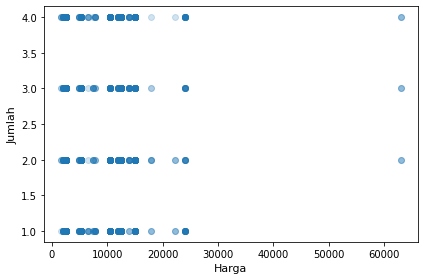

In [5]:
import matplotlib.pyplot as plt
# plot scatter untuuk kolom "Harga" dan "Jumlah"
plt.scatter(df["Harga"], df["Jumlah"], alpha = 0.2)
plt.xlabel("Harga", fontsize=11)
plt.ylabel("Jumlah", fontsize=11)
plt.tight_layout()
plt.show()

Grafik Histogram

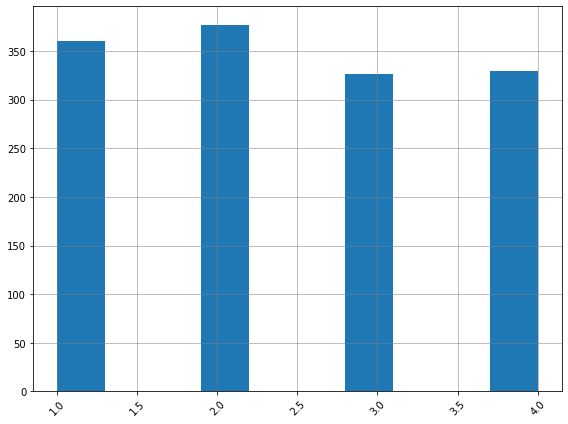

In [6]:
# menampilkan histogram jumlah
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.hist(df["Jumlah"])
plt.grid(color="gray", linestyle="-", linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Line Chart

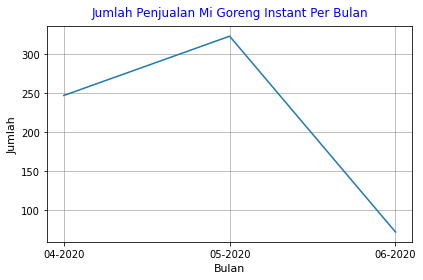

In [7]:
import datetime
# membuat kolom baru bernama "Bulan" yang bertipe datetime dalam format "%m-%Y"
df["Bulan"] = df["Tanggal"].apply(
	lambda x: datetime.datetime.strptime(x, "%d-%m-%Y").strftime("%m-%Y")
)

# mengambil data Mi Goreng Instant saja
produk_mi = df[df["Nama Produk"] == "Mi Goreng Instant"]

# x adalah bulan transaksi
x = ["04-2020","05-2020","06-2020"]

# y jumlah item Mi Goreng Instant yang terjual
y = produk_mi.groupby(["Bulan","Nama Produk"])["Jumlah"].sum()

# membuat line chart menggunakan fungsi plot
plt.plot(x,y)
plt.title("Jumlah Penjualan Mi Goreng Instant Per Bulan", pad=10, fontsize=12, color="blue")
plt.xlabel("Bulan", fontsize=11)
plt.ylabel("Jumlah", fontsize=11)
plt.grid(color="gray", linestyle="-", linewidth=0.5)
plt.tight_layout()
plt.show()

## Mini Project

Tabel Frekuensi Total Penjualan Produk Perbulan

In [8]:
import datetime
# membuat kolom baru bernama "Bulan" yang bertipe datetime dalam format "%m-%Y"
df["Bulan"] = df["Tanggal"].apply(
	lambda x: datetime.datetime.strptime(x, "%d-%m-%Y").strftime("%m-%Y")
)

In [9]:
# Menghitung total harga untuk setiap row
df["Total"] = df["Jumlah"] * df["Harga"]

In [10]:
# menghitung total penjualan per produk per bulan
print(df.groupby(["Bulan", "Nama Produk"])["Total"].sum())

Bulan    Nama Produk            
04-2020  Balsem Putih 20 gram        289900
         Batere AA                   948000
         Bawang Putih 200 gram      2535000
         Beras Pulen 5 kg           1701000
         Biskuit Waver Kaleng       2208000
         Gula Pasir Putih 1 kg      3400000
         Ketan Hitam 500 gram        414000
         Kopi Instant                639600
         Mi Goreng Instant           642200
         Obat Batuk                  365000
         Obat Diare                   20000
         Pisau Cukur                 201500
         Roti Tawar                 1200000
         Sabun Cuci Piring          1344000
         Sabun Mandi Cair 100 ml    2047500
         Sabut Cuci Piring           210000
         Teh Celup Melati            452400
         Telur Ayam Negeri            49300
         Vitamin C                   196000
05-2020  Batere AA                  1116000
         Bawang Putih 200 gram      3300000
         Biskuit Waver Kaleng       1032000

Line Chart Penjualan Kopi Instan Per Bulan

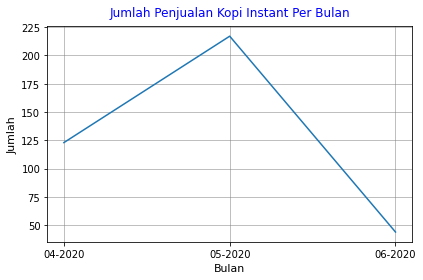

In [11]:
# mengambil data Kopi Instant saja
produk_kopi = df[df["Nama Produk"] == "Kopi Instant"]

# x adalah bulan transaksi
x = ["04-2020", "05-2020", "06-2020"]

# y jumlah item Kopi Instant yang terjual
y = produk_kopi.groupby(["Bulan", "Nama Produk"])["Jumlah"].sum()

import matplotlib.pyplot as plt
# membuat line chart menggunakan fungsi plot
plt.plot(x, y)
plt.title("Jumlah Penjualan Kopi Instant Per Bulan", pad=10, fontsize=12, color="blue")
plt.xlabel("Bulan", fontsize=11)
plt.ylabel("Jumlah",fontsize=11)
plt.grid(color="gray", linestyle="-", linewidth=0.5)
plt.tight_layout()
plt.show()